# Predicting grayscale images of letters P - Z.

The second assignment consists in the classification of
letters from P to Z, by developing a neural network, starting from a dataset containing images
of these letters. In addition it is necessary to develop an autoencoder, to extract the
most important features from the training data.


The data can be loaded as follows:

import pickle 

```
x_train = pickle.load(open("x_train.obj","rb"))

x_test = pickle.load(open("x_test.obj","rb"))

y_train = pickle.load(open("y_train.obj","rb"))
```

The provided data comprises the training set that can be used for the training (and for the validation) and the unlabelled balanced test set.

In [1]:
#amount some libraries for the analysis of the data and development of the model
import pickle 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#preprocessing ops
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


# DL ops
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras.initializers import RandomUniform
from keras.regularizers import l1_l2,l2
from keras.layers import Dropout
from tensorflow.keras import optimizers
from keras.layers import LeakyReLU
from keras.utils import np_utils


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Inspecting the data

During the exploration of the dataset we immediately notice that the size of the train set is 14000 records,
each containing the image of a letter from P to Z in a 28x28 matrix, which indicates the gray scale of each pixel in the image.

In [3]:
x_train = pickle.load(open("drive/MyDrive/x_train.obj","rb"))

x_test = pickle.load(open("drive/MyDrive/x_test.obj","rb"))

y_train = pickle.load(open("drive/MyDrive/y_train.obj","rb"))

In [4]:
x_train.shape

(14000, 28, 28)

In [5]:
x_test.shape

(8800, 28, 28)

In [6]:
type(x_train)

numpy.ndarray

In [7]:
type(x_test)

numpy.ndarray

In [8]:
y_train.shape

(14000,)

In [9]:
y_train[0]

18

In [10]:
unique, counts = np.unique(y_train, return_counts=True)
d=dict(zip(unique, counts))
d

{16: 1295,
 17: 1265,
 18: 1346,
 19: 1329,
 20: 1336,
 21: 1297,
 22: 1269,
 23: 1327,
 24: 1322,
 25: 1321,
 26: 893}

## Preparing the data

The normalization for this reason was carried out simply by dividing each number by 255, since the range of the numbers of these matrices goes from 0 to 255. After that, a reshape is carried out bringing the dataset to have a single vector of values for each sample, this is because the model requires input data in two dimensions. Then we proceeded with the categorization of the variable to be classified, which, with a number from 16 to 26, represented the letter of the alphabet corresponding to that position. Through one hot encoding we obtained 11 variables of convenience useful for the problem. Finally, it was decided to split the train set in order to obtain a 25% of records needed for the validation set.

In [11]:
#split train and validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train)

In [12]:
y_val

array([21, 25, 19, ..., 25, 24, 19], dtype=uint8)

In [13]:
num_classes=len(d)

num_classes

11

In [14]:
#categorization
y_train = to_categorical((y_train-16), num_classes)
y_val = to_categorical((y_val-16), num_classes)

In [15]:
#normalization and reshape
x_train = x_train.astype('float32') / 255.
x_val = x_val.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_val = x_val.reshape((len(x_val), np.prod(x_val.shape[1:])))
print(x_train.shape)
print(x_val.shape)

(10500, 784)
(3500, 784)


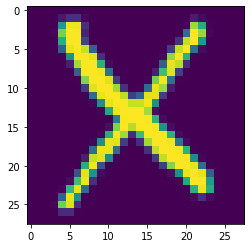

In [16]:
plt.imshow(x_train[0].reshape(28, 28))

# 1. The resolution of the problem of supervised classification with a traditional neural network [Mandatory]

- 200 epochs
- 2 hidden layers in order of 512 and 256 neurons.
- activation function hidden layers: ReLU
- output layer activation function: Softmax
- optimizer: Adam
- loss function: categorical_crossentropy
- regularization: 2 dropout layers and L1 & L2 regularizers


## Building the network


The number of epochs was chosen according to when the accuracy of the train set and the test set reached convergence, avoiding overfitting and/or underfitting. The number of layers and neurons was chosen after several attempts, looking for a good compromise between complexity and performance. For the activation function of the hidden layers, the ReLU, the one most commonly used, was the most performing, while for the activation function of the output layers the Softmax was a choice forced by the fact that it was a multiclass classification. The optimizer used for this model was Adam, adaptive algorithm and widely used given its performance. To avoid overfitting, L1 and L2 regularizers and two dropout layers were introduced. The loss function categorical_crossentropy is practically compulsory since there are several classes to estimate.

In [17]:
n_epochs = 200
batch_size = 512

In [18]:
dims = x_train.shape[1]
nb_classes = 11

In [19]:
adam = optimizers.Adam()

In [20]:
model = Sequential()

model.add(Dense(512, input_dim=dims,activation="relu",kernel_regularizer=l2(0.005)))
model.add(Dropout(0.4))
model.add(Dense(256,activation="relu",kernel_regularizer=l1_l2(l1=0.001,l2=0.001)))
model.add(Dropout(0.4))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
network_history=model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=batch_size, epochs=n_epochs)

Epoch 1/200
21/21 [==============================] - 2s 47ms/step - loss: 9.2684 - accuracy: 0.5089 - val_loss: 7.0576 - val_accuracy: 0.7329
Epoch 2/200
21/21 [==============================] - 1s 37ms/step - loss: 6.0244 - accuracy: 0.7312 - val_loss: 4.7422 - val_accuracy: 0.7937
Epoch 3/200
21/21 [==============================] - 1s 37ms/step - loss: 4.0900 - accuracy: 0.7735 - val_loss: 3.2324 - val_accuracy: 0.8054
Epoch 4/200
21/21 [==============================] - 1s 37ms/step - loss: 2.8407 - accuracy: 0.7880 - val_loss: 2.2896 - val_accuracy: 0.8154
Epoch 5/200
21/21 [==============================] - 1s 36ms/step - loss: 2.0955 - accuracy: 0.8020 - val_loss: 1.7590 - val_accuracy: 0.8317
Epoch 6/200
21/21 [==============================] - 1s 37ms/step - loss: 1.6796 - accuracy: 0.8095 - val_loss: 1.4683 - val_accuracy: 0.8397
Epoch 7/200
21/21 [==============================] - 1s 36ms/step - loss: 1.4553 - accuracy: 0.8170 - val_loss: 1.2959 - val_accuracy: 0.8369
Epoch 

## Analyze and comment the training results

There does not appear to be any indication that underfitting/overfitting is present. The two curves have a similar trend and the loss function is relatively small despite the regularization. 

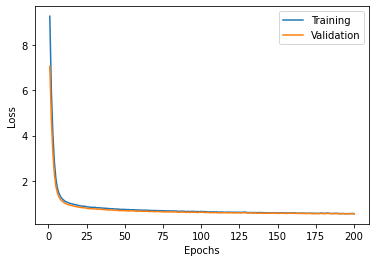

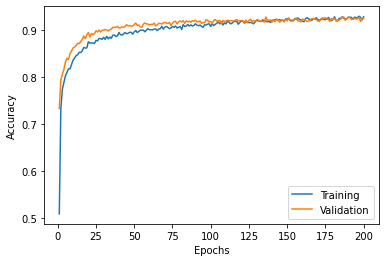

In [21]:
x_plot = list(range(1,n_epochs+1))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['accuracy'])
    plt.plot(x_plot, network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

plot_history(network_history)

## Validate the model and comment the results

As was mentioned earlier, the model seems to behave quite well and this is confirmed by the confusion matrix; in most cases the model classifies letters correctly, except for a few, which are probably (not all)difficult to classify even with the human eye. Also, since there are no problems with class balancing, the performance of the model was evaluated on accuracy. Other measures such as precision, recall, and F-score were added for completeness.



In [22]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))
prf=precision_recall_fscore_support(y_val.argmax(axis=1), y_pred.argmax(axis=1))

In [23]:
print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")

confusion matrix
 [[305   9  12   0   1   1   0   3   0   2   1]
 [  6 301   3   3   1   3   0   1   0   3   1]
 [  5   4 302   0   2   2   1   0   8   2   2]
 [  0   4   1 322   1   2   0   0   0   0   2]
 [  1   4   4   3 329   1   0   0   1   2   3]
 [  0   3   2   0   0 303   6   2   2   1   0]
 [  0   1   7   0   2  17 270   2   0   8   0]
 [  0   0   1   0   2  12   7 311   0   1   0]
 [  0   1   4   0   1   0   4   0 285   9   2]
 [  2   8   2   1  11   7  13   0   3 283   0]
 [  0   3   1   1   6   1   1   1   0   0 226]]
precision
 [0.95611285 0.89053254 0.89085546 0.97575758 0.9241573  0.86819484
 0.89403974 0.971875   0.95317726 0.90996785 0.9535865 ]
recall
 [0.91317365 0.93478261 0.92073171 0.96987952 0.9454023  0.94984326
 0.87947883 0.93113772 0.93137255 0.85757576 0.94166667]
f-score
 [0.93415008 0.91212121 0.90554723 0.97280967 0.93465909 0.90718563
 0.88669951 0.95107034 0.94214876 0.88299532 0.9475891 ]


In [24]:
cr=classification_report(y_val.argmax(axis=1), y_pred.argmax(axis=1))
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93       334
           1       0.89      0.93      0.91       322
           2       0.89      0.92      0.91       328
           3       0.98      0.97      0.97       332
           4       0.92      0.95      0.93       348
           5       0.87      0.95      0.91       319
           6       0.89      0.88      0.89       307
           7       0.97      0.93      0.95       334
           8       0.95      0.93      0.94       306
           9       0.91      0.86      0.88       330
          10       0.95      0.94      0.95       240

    accuracy                           0.92      3500
   macro avg       0.93      0.93      0.93      3500
weighted avg       0.93      0.92      0.92      3500



## Make predictions (on the provided test set)

I expect the model to be robust even on the data provided as a test. This is because two strategies for regularization have been developed (drop out and PL-norm), enough to think (and hope) that it will have good results even on never-before-seen data. I did not use the early stopping because the convergence was slow and therefore needs many iterations; moreover having 3 different forms of regularization would be more harmful than useful to the model. 

In [25]:
#normalization and reshape
x_test = x_test.astype('float32') / 255.
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_test.shape)

(8800, 784)


In [26]:
y_test = model.predict(x_test)
y_test.argmax(axis=1)

array([ 6, 10,  9, ...,  6,  7,  4])

In [27]:
pos = {
  0: 16,
  1: 17,
  2: 18,
  3: 19,
  4: 20,
  5: 21,
  6: 22,
  7: 23,
  8: 24,
  9: 25,
  10: 26
  }
print(pos)

{0: 16, 1: 17, 2: 18, 3: 19, 4: 20, 5: 21, 6: 22, 7: 23, 8: 24, 9: 25, 10: 26}


In [28]:
new_y_test = []
for i in range (0, len(y_test.argmax(axis=1))):
  let = pos[y_test.argmax(axis=1)[i]]
  new_y_test.append(let)

## [OPTIONAL] -- Export the predictions in the format indicated in the assignment release page.

In [29]:
np.savetxt('Nabil_ELAsri_826040_score2.txt', new_y_test, newline='\n', fmt='%d', encoding="UTF-16")

# 2. The developement of a simple auto-encoder model  [Mandatory]

Also for the autoencoder the parameters were chosen after several attempts and making fairly standard choices in the neural network field and justifying them as previously done. The loss function is obviously different since the pixels to be reconstructed are in a range between 0 and 1, it becomes necessary to have a loss function that takes into account the fact that they are binary values.


## Building the network

- 200 epochs
- Input layer of 784 
- 512 neuron encoder
- Hidden layer of 32 neurons
- Decoder of 512 neurons
- Output layer of 784
- activation function ReLU, activation function output layer: Sigmoid
- optimizer: Adam
- loss function: binary_crossentropy


In [30]:
encoding_dim = 32 

input_img = Input(shape=(784,))
enc1 = Dense(512, activation = 'relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(enc1)

dec1 = Dense(512, activation="relu")(encoded)
decoded = Dense(784, activation='sigmoid')(dec1)

autoencoder = Model(input_img, decoded)

In [31]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-2]
# create the decoder model
decoder = Model(encoded_input, autoencoder.layers[-1](decoder_layer(encoded_input)))

In [32]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 32)                16416     
                                                                 
 dense_5 (Dense)             (None, 512)               16896     
                                                                 
 dense_6 (Dense)             (None, 784)               402192    
                                                                 
Total params: 837,424
Trainable params: 837,424
Non-trainable params: 0
_________________________________________________________________


In [33]:
network_history=autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/100
42/42 [==============================] - 2s 36ms/step - loss: 0.4109 - val_loss: 0.3193
Epoch 2/100
42/42 [==============================] - 1s 33ms/step - loss: 0.2846 - val_loss: 0.2547
Epoch 3/100
42/42 [==============================] - 1s 33ms/step - loss: 0.2355 - val_loss: 0.2194
Epoch 4/100
42/42 [==============================] - 1s 33ms/step - loss: 0.2060 - val_loss: 0.2006
Epoch 5/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1892 - val_loss: 0.1854
Epoch 6/100
42/42 [==============================] - 1s 34ms/step - loss: 0.1789 - val_loss: 0.1785
Epoch 7/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1729 - val_loss: 0.1855
Epoch 8/100
42/42 [==============================] - 1s 34ms/step - loss: 0.1707 - val_loss: 0.1679
Epoch 9/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1650 - val_loss: 0.1665
Epoch 10/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1623 - val_loss: 0.1641

In [34]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_val)
decoded_imgs = decoder.predict(encoded_imgs)
print(encoded_imgs.shape)
print(decoded_imgs.shape)

(3500, 32)
(3500, 784)


## Inspecting the visual results 

Visually it seems to reconstruct the letters well by extracting the main features.

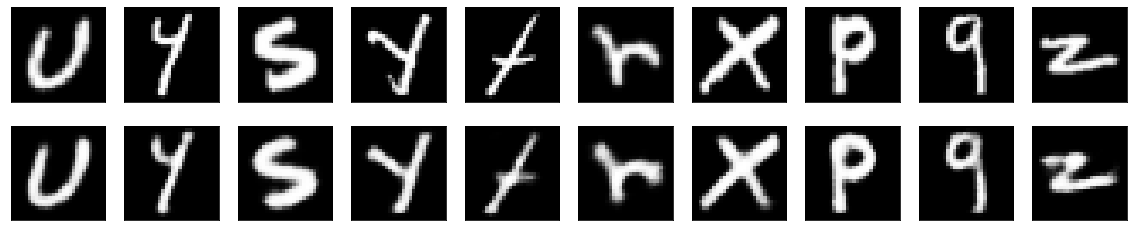

In [35]:
encoded_imgs = encoder.predict(x_val)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_val[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 3. [OPTIONAL] The use and evaluation of the encoded representation generated by the auto-encoder to solve the problem of supervised classification.

In order to evaluate the performances of classification of the model, we have replaced the last layer of
dimension 784 with one composed of 11 neurons, that is the number of classes that can represent
the output. The activation function is changed and used the softmax by virtue of the more classes. The results
however do not improve with respect to the previous model.



In [36]:
input_img = Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(512, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [37]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_val, x_val))

Epoch 1/100
42/42 [==============================] - 2s 38ms/step - loss: 0.4054 - accuracy: 0.0085 - val_loss: 0.3113 - val_accuracy: 0.0137
Epoch 2/100
42/42 [==============================] - 1s 33ms/step - loss: 0.2803 - accuracy: 0.0231 - val_loss: 0.2507 - val_accuracy: 0.0346
Epoch 3/100
42/42 [==============================] - 1s 33ms/step - loss: 0.2291 - accuracy: 0.0441 - val_loss: 0.2104 - val_accuracy: 0.0583
Epoch 4/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1992 - accuracy: 0.0704 - val_loss: 0.1939 - val_accuracy: 0.0717
Epoch 5/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1856 - accuracy: 0.0826 - val_loss: 0.1843 - val_accuracy: 0.0811
Epoch 6/100
42/42 [==============================] - 1s 33ms/step - loss: 0.1767 - accuracy: 0.0935 - val_loss: 0.1740 - val_accuracy: 0.0909
Epoch 7/100
42/42 [==============================] - 1s 34ms/step - loss: 0.1692 - accuracy: 0.1010 - val_loss: 0.1704 - val_accuracy: 0.0983
Epoch 

In [38]:
from keras.layers import Flatten
num_classes = 11

den = Dense(64, activation='relu')(encoded)
out = Dense(num_classes, activation='softmax')(den)

full_model = Model(input_img,out)

In [39]:
full_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 32)                16416     
                                                                 
 dense_11 (Dense)            (None, 64)                2112      
                                                                 
 dense_12 (Dense)            (None, 11)                715       
                                                                 
Total params: 421,163
Trainable params: 421,163
Non-trainable params: 0
_________________________________________________________________


In [40]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 32)                16416     
                                                                 
 dense_9 (Dense)             (None, 512)               16896     
                                                                 
 dense_10 (Dense)            (None, 784)               402192    
                                                                 
Total params: 837,424
Trainable params: 837,424
Non-trainable params: 0
_________________________________________________________________


In [41]:
for l1,l2 in zip(full_model.layers[:3],autoencoder.layers[0:3]):
    l1.set_weights(l2.get_weights())
for layer in full_model.layers[0:3]:
    layer.trainable = True

In [42]:
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
full_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.SGD(),metrics=['accuracy'])
classify_train = full_model.fit(x_train,y_train,validation_data=(x_val,y_val),batch_size=512, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 30ms/step - loss: 4.0951 - accuracy: 0.1955 - val_loss: 2.0754 - val_accuracy: 0.3174
Epoch 2/100
21/21 [==============================] - 0s 23ms/step - loss: 1.7756 - accuracy: 0.4232 - val_loss: 1.5615 - val_accuracy: 0.4903
Epoch 3/100
21/21 [==============================] - 0s 23ms/step - loss: 1.4220 - accuracy: 0.5420 - val_loss: 1.3095 - val_accuracy: 0.5726
Epoch 4/100
21/21 [==============================] - 0s 23ms/step - loss: 1.2314 - accuracy: 0.6058 - val_loss: 1.1657 - val_accuracy: 0.6246
Epoch 5/100
21/21 [==============================] - 0s 23ms/step - loss: 1.1033 - accuracy: 0.6510 - val_loss: 1.0553 - val_accuracy: 0.6757
Epoch 6/100
21/21 [==============================] - 0s 23ms/step - loss: 1.0078 - accuracy: 0.6893 - val_loss: 0.9830 - val_accuracy: 0.6931
Epoch 7/100
21/21 [==============================] - 0s 22ms/step - loss: 0.9447 - accuracy: 0.7086 - val_loss: 0.9167 - val_accuracy: 0.7203
Epoch 

In [43]:
y_pred_2 = full_model.predict(x_val)
cm = confusion_matrix(y_val.argmax(axis=1), y_pred_2.argmax(axis=1))
prf=precision_recall_fscore_support(y_val.argmax(axis=1), y_pred_2.argmax(axis=1))

In [44]:
print(f"confusion matrix\n {cm}")
print(f"precision\n {prf[0]}")
print(f"recall\n {prf[1]}")
print(f"f-score\n {prf[2]}")

confusion matrix
 [[296   7  20   0   6   2   0   1   1   1   0]
 [  7 277   7   5  10   1   0   2   2   6   5]
 [  8   4 294   1   6   1   2   3   5   1   3]
 [  0   6   1 309   3   7   0   0   0   2   4]
 [  1   6  18   5 299   3   1   1   1  10   3]
 [  0   3   3   0   0 287  14   5   5   1   1]
 [  1   1   8   0   4  17 255   3   3  15   0]
 [  0   4   1   0   2   9   9 303   0   3   3]
 [  0   0  10   0   1   2   6   1 275   8   3]
 [  2   3   3   4  15   2  14   2   5 279   1]
 [  1   1   8   3   6   1   0   3   1   0 216]]
precision
 [0.93670886 0.88782051 0.78820375 0.94495413 0.84943182 0.86445783
 0.84717608 0.93518519 0.92281879 0.85582822 0.90376569]
recall
 [0.88622754 0.86024845 0.89634146 0.93072289 0.8591954  0.89968652
 0.83061889 0.90718563 0.89869281 0.84545455 0.9       ]
f-score
 [0.91076923 0.87381703 0.83880171 0.93778452 0.85428571 0.88172043
 0.83881579 0.92097264 0.91059603 0.85060976 0.90187891]


In [45]:
cr=classification_report(y_val.argmax(axis=1), y_pred_2.argmax(axis=1))
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       334
           1       0.89      0.86      0.87       322
           2       0.79      0.90      0.84       328
           3       0.94      0.93      0.94       332
           4       0.85      0.86      0.85       348
           5       0.86      0.90      0.88       319
           6       0.85      0.83      0.84       307
           7       0.94      0.91      0.92       334
           8       0.92      0.90      0.91       306
           9       0.86      0.85      0.85       330
          10       0.90      0.90      0.90       240

    accuracy                           0.88      3500
   macro avg       0.89      0.88      0.88      3500
weighted avg       0.88      0.88      0.88      3500

